In [10]:
import yaml
from TraceSimulator import TraceSimulator

yaml_str = """
LCE: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_LCE.npz'
optArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/optical/optSim_arrivalTime.npz'
PCE: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_PCE.npz'
phonArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/acoustic/phonSim_phonTemplate.npz'
TCE: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_TCE.npz'
trArrivalTime: '/ceph/bmaier/delight/share/TraceSimulator/triplet/trSim_trTemplate.npz'
positionMMC: '/ceph/bmaier/delight/share/TraceSimulator/position_MMC.dat'
# from X-ray MMC analysis
sampling_frequency: 3906250
trace_samples: 32768
noise_type: 'white'
noise_power: 121
"""

config = yaml.safe_load(yaml_str)
ts = TraceSimulator(config)


In [2]:
import matplotlib.pyplot as plt

def plot_trace_set(trace_set):
    """
    Plot all 54 channels of a single trace set (shape: (54, 32768))
    """
    
    fig, axs = plt.subplots(9, 6, figsize=(20, 10), sharex=True)
    axs = axs.flatten()
    for ch in range(54):
        axs[ch].plot(trace_set[ch])
        axs[ch].set_title(f'Ch {ch}')
    plt.tight_layout()
    plt.show()

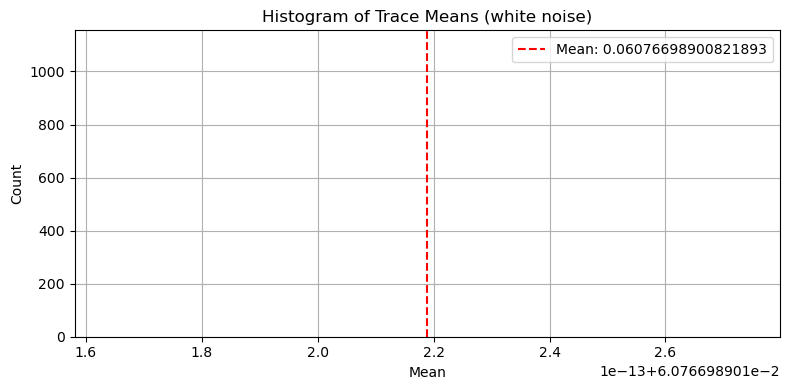

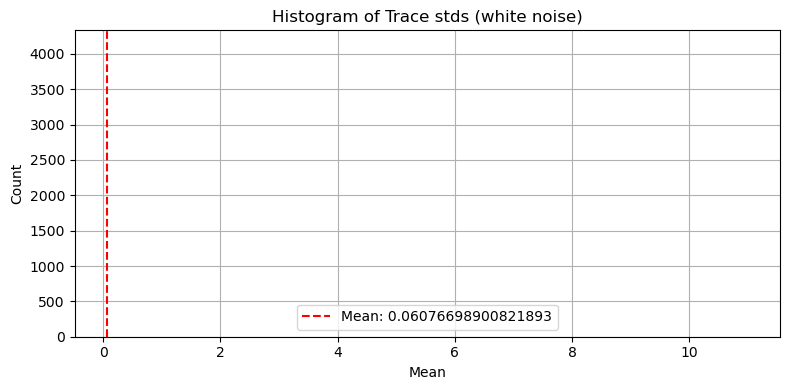

In [11]:
import numpy as np
import matplotlib.pyplot as plt

means = []
stds = []

# Generate 100 sets of traces
for _ in range(100):
    trace_batch = ts.generate(
        E=0,
        x=-40, y=80, z=-1800,
        no_noise=False,
        type_recoil='NR',
        quantize=False,
        phonon_only=False
    )  # shape assumed to be (1, num_traces_per_batch, trace_length)

    batch = trace_batch[0]  # shape: (num_traces, trace_length)

    for trace in batch:
        means.append(np.mean(trace))
        stds.append(np.std(trace))

# Plot histogram of means
plt.figure(figsize=(8, 4))
plt.hist(means, bins=50, alpha=0.75)
plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means)}")
plt.title("Histogram of Trace Means (white noise)")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Plot histogram of means
plt.figure(figsize=(8, 4))
plt.hist(stds, bins=50, alpha=0.75)
plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means)}")
plt.title("Histogram of Trace stds (white noise)")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
np.mean(stds)

10.999832152039728

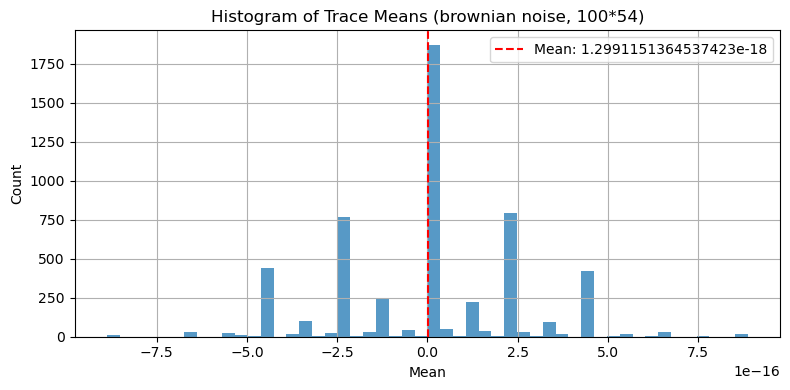

In [25]:
plt.figure(figsize=(8, 4))
plt.hist(means, bins=50, alpha=0.75)
plt.axvline(np.mean(means), color='red', linestyle='--', label=f"Mean: {np.mean(means)}")
plt.title("Histogram of Trace Means (brownian noise, 100*54)")
plt.xlabel("Mean")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
trace_batch = ts.generate(
        E=0,
        x=-40, y=80, z=-1800,
        no_noise=False,
        type_recoil='NR',
        quantize=False,
        phonon_only=False
    )  # shape assumed to be (1, num_traces_per_batch, trace_length)


In [30]:
np.mean(trace_batch[0][0])

-2.220446049250313e-16

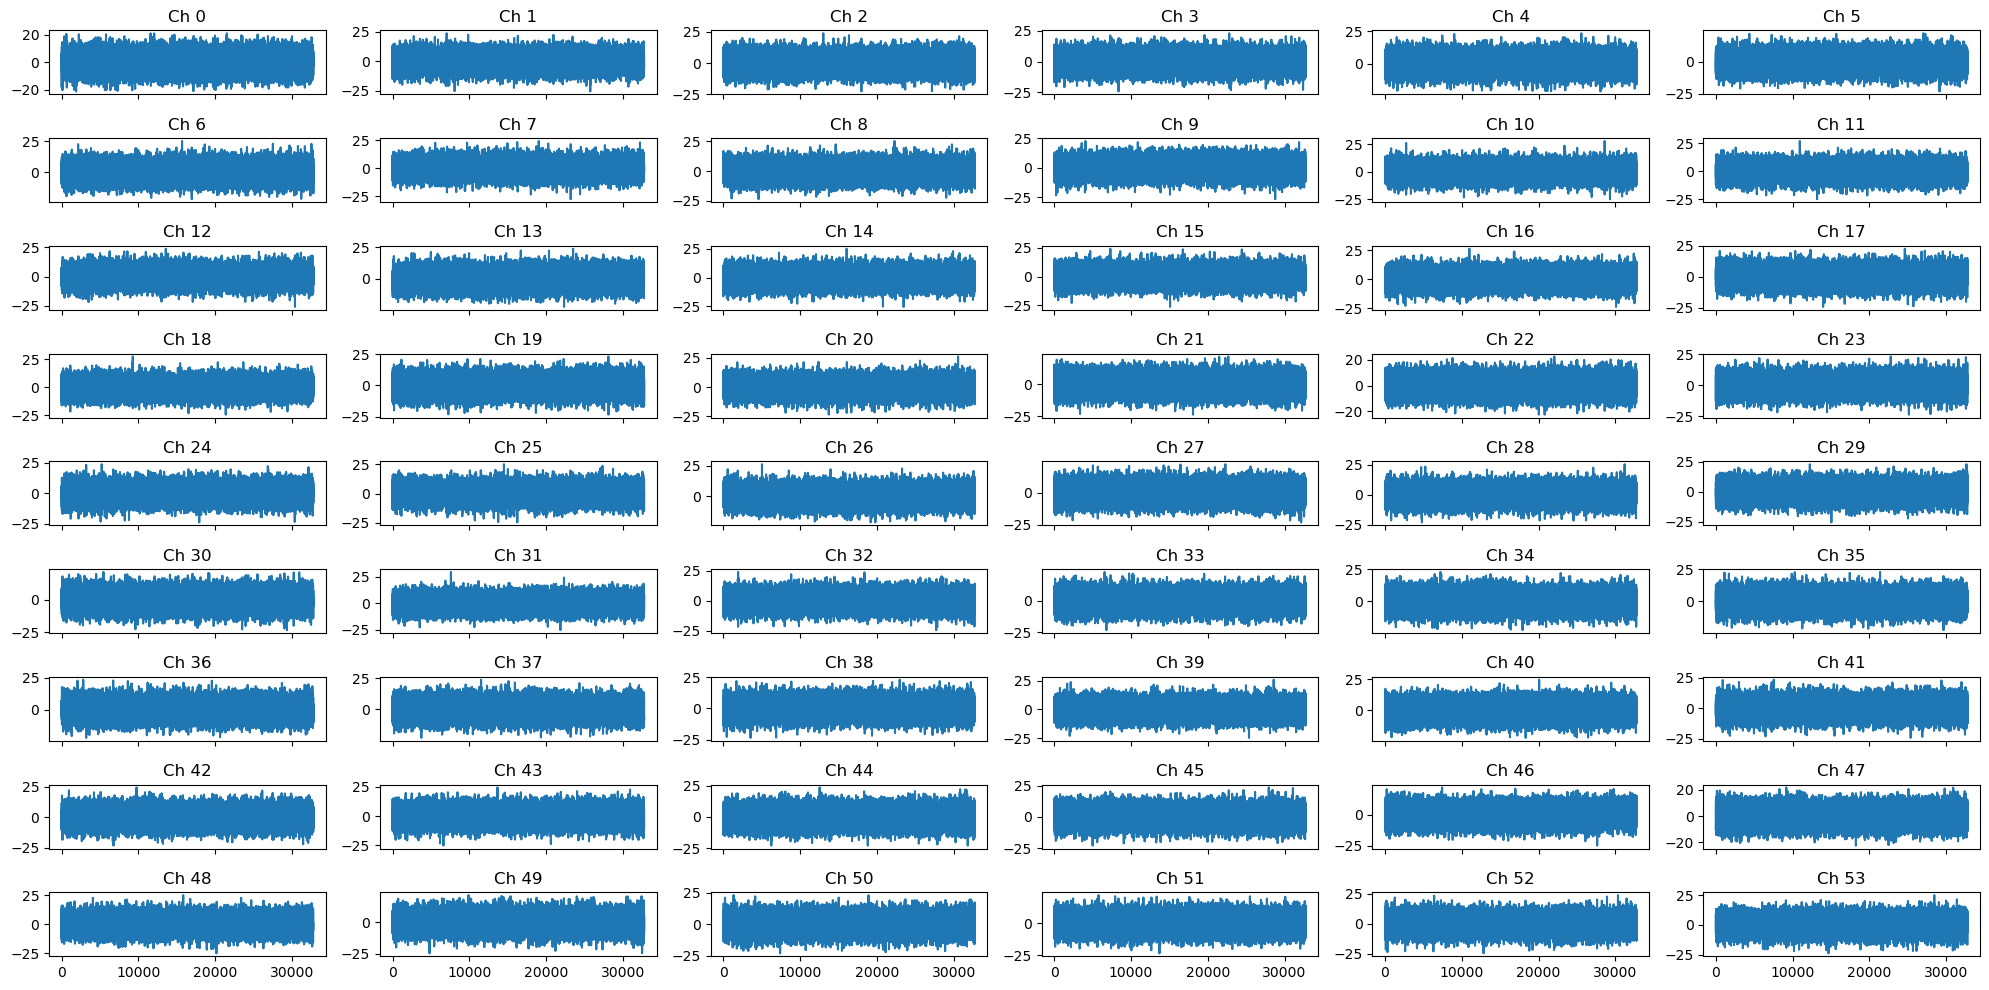

In [16]:
plot_trace_set(trace_batch[0])